In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 34s 0us/step


In [0]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [0]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 15s 296us/step - loss: 1.9216 - acc: 0.3106 - val_loss: 1.7620 - val_acc: 0.3708
Epoch 2/500
50000/50000 [==============================] - 14s 281us/step - loss: 1.6976 - acc: 0.3939 - val_loss: 1.6704 - val_acc: 0.4009
Epoch 3/500
50000/50000 [==============================] - 14s 280us/step - loss: 1.6193 - acc: 0.4222 - val_loss: 1.6037 - val_acc: 0.4244
Epoch 4/500
50000/50000 [==============================] - 14s 276us/step - loss: 1.5568 - acc: 0.4447 - val_loss: 1.5554 - val_acc: 0.4459
Epoch 5/500
50000/50000 [==============================] - 14s 273us/step - loss: 1.5133 - acc: 0.4626 - val_loss: 1.5574 - val_acc: 0.4382
Epoch 6/500
50000/50000 [==============================] - 13s 269us/step - loss: 1.4646 - acc: 0.4783 - val_loss: 1.4893 - val_acc: 0.4693
Epoch 7/500
50000/50000 [==============================] - 14s 271us/step - loss: 1.4442 - acc: 0.4828 - val_l

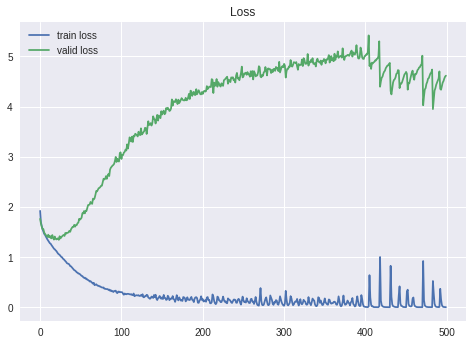

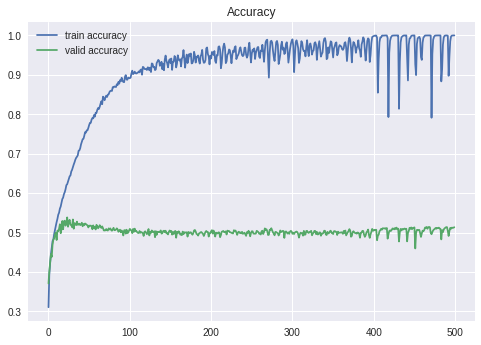

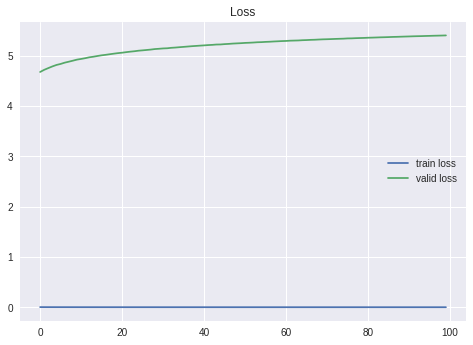

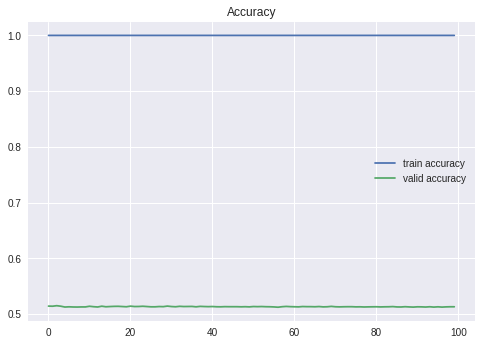

In [0]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [0]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=sgd)

In [7]:
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 299us/step - loss: 1.8484 - acc: 0.3383 - val_loss: 1.6974 - val_acc: 0.4018
Epoch 2/100
50000/50000 [==============================] - 13s 267us/step - loss: 1.6453 - acc: 0.4167 - val_loss: 1.6051 - val_acc: 0.4333
Epoch 3/100
50000/50000 [==============================] - 14s 283us/step - loss: 1.5549 - acc: 0.4501 - val_loss: 1.7258 - val_acc: 0.4061
Epoch 4/100
50000/50000 [==============================] - 14s 288us/step - loss: 1.4939 - acc: 0.4688 - val_loss: 1.5476 - val_acc: 0.4536
Epoch 5/100
50000/50000 [==============================] - 14s 288us/step - loss: 1.4441 - acc: 0.4897 - val_loss: 1.5342 - val_acc: 0.4610
Epoch 6/100
50000/50000 [==============================] - 14s 287us/step - loss: 1.4021 - acc: 0.5041 - val_loss: 1.4872 - val_acc: 0.4764
Epoch 7/100
50000/50000 [==============================] - 14s

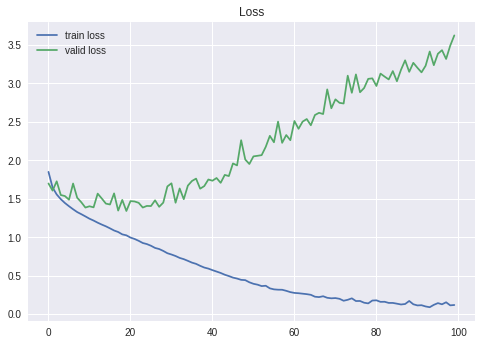

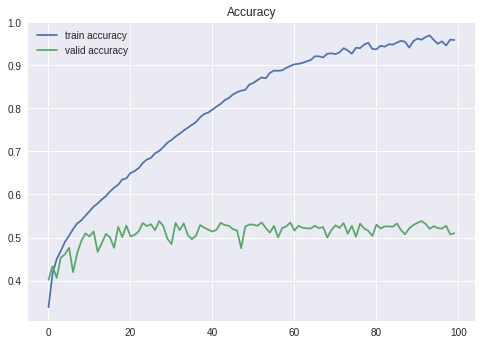

In [8]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train1_loss = model.history.history["loss"]
valid1_loss = model.history.history["val_loss"]

train1_acc = model.history.history["acc"]
valid1_acc = model.history.history["val_acc"]

plt.plot(range(len(train1_loss)), train1_loss, label="train loss")
plt.plot(range(len(valid1_loss)), valid1_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train1_acc)), train1_acc, label="train accuracy")
plt.plot(range(len(valid1_acc)), valid1_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()